In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

In [96]:
header=["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
 "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
 "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
 "peak-rpm","city-mpg","highway-mpg","price"]

In [113]:
dataset = pd.read_csv('/content/auto.csv', names = header)
dataset.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [114]:
dataset.replace("?",np.nan, inplace=True)
dataset.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [115]:
dataset.shape

(205, 26)

In [116]:
dataset.isnull().sum().sort_values(ascending=False)[:10]

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
horsepower            2
num-of-doors          2
length                0
make                  0
fuel-type             0
dtype: int64

In [117]:
dataset= dataset.dropna(subset=['price'])
dataset.shape

(201, 26)

In [118]:
mean_col = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']
dataset[mean_col] = dataset[mean_col].astype('float64')
dataset[mean_col] = dataset[mean_col].fillna(dataset[mean_col].mean())
dataset[mean_col].isnull().sum()

normalized-losses    0
bore                 0
stroke               0
horsepower           0
peak-rpm             0
dtype: int64

In [119]:
dataset['num-of-doors'].fillna(dataset['num-of-doors'].mode()[0], inplace=True)

In [120]:
dataset.reset_index(inplace = True)
dataset.head(5)

,index,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [121]:
dataset.dtypes

index                  int64
symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [122]:
dataset['city-L/100km'] = 235 / dataset['city-mpg']
dataset['highway-L/100km'] = 235 / dataset['highway-mpg']
dataset.head(5)

,index,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,11.190476,8.703704
1,1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,11.190476,8.703704
2,2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,12.368421,9.038462
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,9.791667,7.833333
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,13.055556,10.681818


In [123]:
dataset['length']=dataset['length']/dataset['length'].max()
dataset['width']=dataset['width']/dataset['width'].max()
dataset['height']=dataset['height']/dataset['height'].max()
dataset.head(5)

,index,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,11.190476,8.703704
1,1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,11.190476,8.703704
2,2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,12.368421,9.038462
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,9.791667,7.833333
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,13.055556,10.681818


(array([44., 45., 48., 24., 14., 16.,  5.,  4.,  0.,  1.]),
 array([ 48. ,  69.4,  90.8, 112.2, 133.6, 155. , 176.4, 197.8, 219.2,
        240.6, 262. ]),
 <a list of 10 Patch objects>)

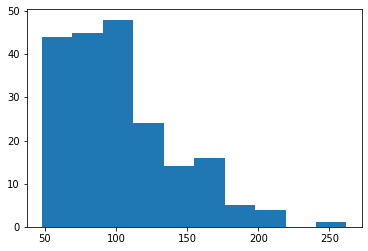

In [124]:
plt.pyplot.hist(dataset["horsepower"])

In [125]:
binwidth = (dataset['horsepower'].max() - dataset['horsepower'].min())/4 
bins = np.arange(dataset['horsepower'].min(), dataset['horsepower'].max(), binwidth)
group_names = ['low', 'medium', 'high'] 
dataset['horsepower-binned'] = pd.cut(dataset['horsepower'], bins, labels = group_names, include_lowest = True)
dataset.head(5)

,index,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned
0,0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,11.190476,8.703704,medium
1,1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,11.190476,8.703704,medium
2,2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,12.368421,9.038462,medium
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,9.791667,7.833333,medium
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,13.055556,10.681818,medium


<BarContainer object of 3 artists>

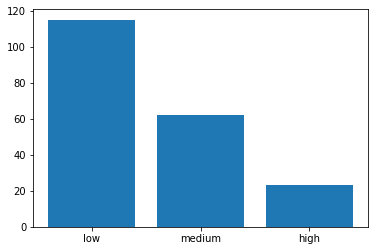

In [126]:
pyplot.bar(group_names, dataset["horsepower-binned"].value_counts())

In [127]:
drop_col = ['fuel-type', 'aspiration']
dataset = pd.concat([dataset.drop(drop_col, axis=1), pd.get_dummies(dataset[drop_col])], axis=1)
dataset.head(5)

,index,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo
0,0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495,11.190476,8.703704,medium,0,1,1,0
1,1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500,11.190476,8.703704,medium,0,1,1,0
2,2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,12.368421,9.038462,medium,0,1,1,0
3,3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,9.791667,7.833333,medium,0,1,1,0
4,4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,13.055556,10.681818,medium,0,1,1,0
